# Charting SP 500

## Settings

In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rcParams
import matplotlib.font_manager as fm
plt.style.use('default')
#plt.style.use(['ggplot'])
#plt.style.use(['ggplot','my_custom_style'])
#plt.style.use('default')
print(mpl.__version__)

3.6.2


In [2]:
config_file = mpl.matplotlib_fname()
print(f"Configuration File Path: {config_file}")

print('\n')
config_dir = mpl.get_configdir()
print(f"Configuration Directory Path: {config_dir}")

Configuration File Path: c:\Users\awaul\anaconda3\envs\a_python\lib\site-packages\matplotlib\mpl-data\matplotlibrc


Configuration Directory Path: C:\Users\awaul\.matplotlib


In [3]:
fonts = mpl.font_manager.get_font_names()
 
font_choice = 'Open Sans'
if font_choice in fonts:
    print(f'{font_choice} is available.')
else:
    print(f'{font_choice} is not available.')


Open Sans is available.


## Import Data

In [4]:
spx_data = pd.read_csv("../../data/spx.csv")
spx_data.head()

,Date,Open,High,Low,Close
0,01/27/23,4053.72,4094.21,4048.70,4070.56
1,01/26/23,4036.08,4061.57,4013.29,4060.43
2,01/25/23,3982.71,4019.55,3949.06,4016.22
3,01/24/23,4001.74,4023.92,3989.79,4016.95
4,01/23/23,3978.14,4039.31,3971.64,4019.81


In [5]:
spx_data.info()
print('\n')
print(spx_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    270 non-null    object 
 1    Open   270 non-null    float64
 2    High   270 non-null    float64
 3    Low    270 non-null    float64
 4    Close  270 non-null    float64
dtypes: float64(4), object(1)
memory usage: 10.7+ KB


Index(['Date', ' Open', ' High', ' Low', ' Close'], dtype='object')


## Clean Column Names

Remove the leading space from column names.

In [6]:
spx_data.rename(columns=lambda x: x.strip(), inplace=True)
print(spx_data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')


## Change Data Type for Date
Change the date column from object to datetime data.

In [7]:
spx_data['Date'] = pd.to_datetime(spx_data['Date'])
print(spx_data['Date'].dtype)

datetime64[ns]


## Pyplot Line Chart

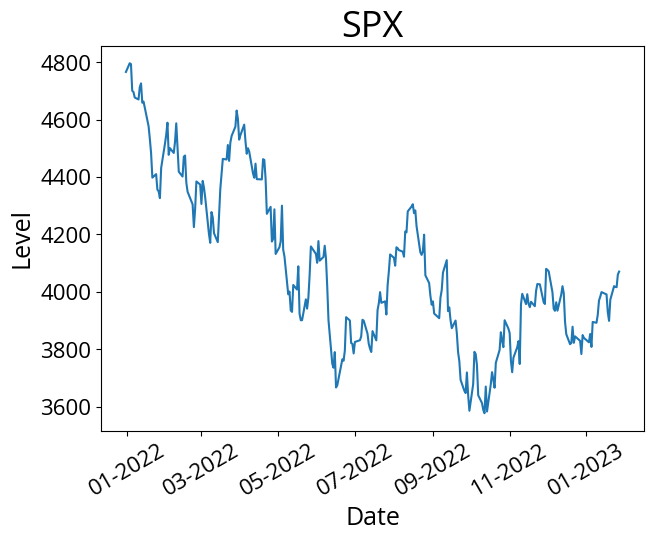

In [8]:
# Default Line Plot with Custom Settings - Pyplot
z = 'Open Sans'

title_font= {'family': z}
xlabel_font = {'family': z}
ylabel_font = {'family': z}

fig = plt.figure(figsize=(7,5))
plt.plot(spx_data.Date, spx_data.Close)
plt.title('SPX', fontdict=title_font, fontsize=26)
plt.xlabel('Date', fontdict=xlabel_font, fontsize=18)
plt.ylabel('Level', fontdict=ylabel_font, fontsize=18)
plt.xticks(fontname=z, rotation=30, fontsize=16)
plt.yticks(fontname=z,fontsize=16)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.grid : True
plt.show()


## Temporary StyleSheet


[]

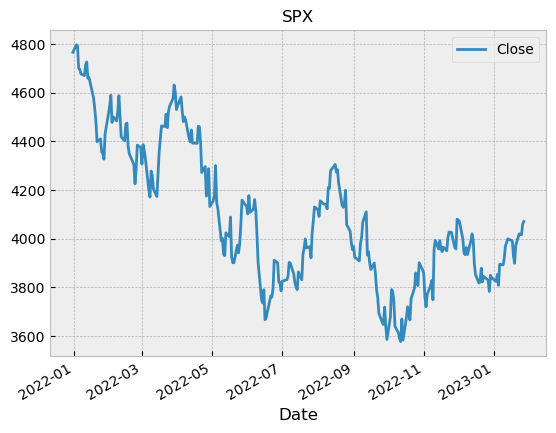

In [9]:
with plt.style.context('bmh'):
    spx_data.plot.line('Date','Close')
plt.title('SPX')
plt.plot()




## Combined StyleSheets

[]

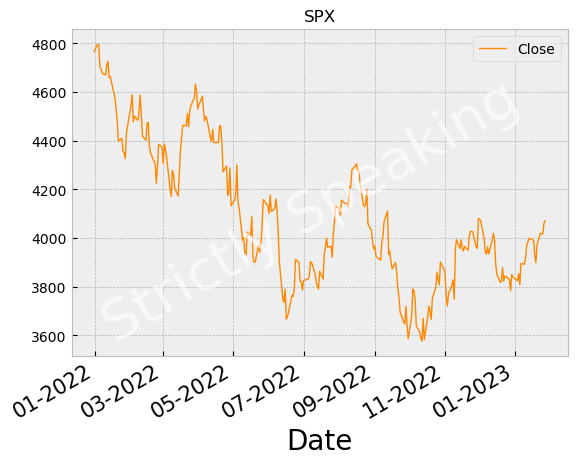

In [10]:
# Create a Watermark on Chart

a = ['bmh','mystyle']

with plt.style.context(a):
    spx_data.plot.line('Date','Close')
plt.text(0.5, 0.5, 'Strictly Speaking', fontsize=40, color='white',rotation=30,
ha='center', va='center', alpha=0.65, transform=plt.gcf().transFigure)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.title('SPX')
plt.plot()

## Seaborn Relational Plots (Multivariate)

In [11]:
housing = pd.read_csv("../../data/housing.csv")
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Year,Rooms
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,5,2010,WD,Normal,215000,1999 or older,7 rooms or more
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,MnPrv,NaN,0,6,2010,WD,Normal,105000,1999 or older,6 rooms or less
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,NaN,Gar2,12500,6,2010,WD,Normal,172000,1999 or older,6 rooms or less
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,4,2010,WD,Normal,244000,1999 or older,7 rooms or more
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,MnPrv,NaN,0,3,2010,WD,Normal,189900,1999 or older,6 rooms or less


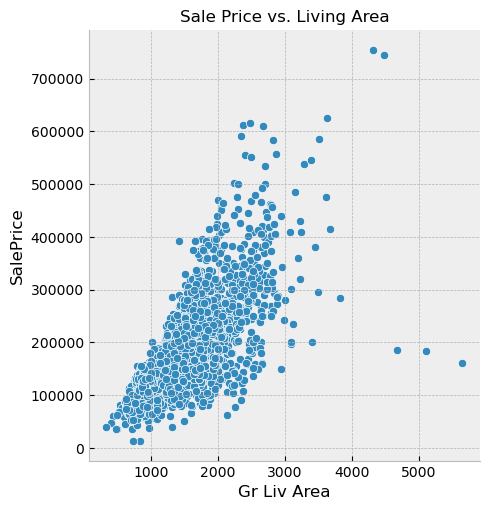

In [12]:
import seaborn as sns
with plt.style.context('bmh'):
    sns.relplot(data = housing, x = "Gr Liv Area", y = "SalePrice")
plt.title("Sale Price vs. Living Area")
plt.show()

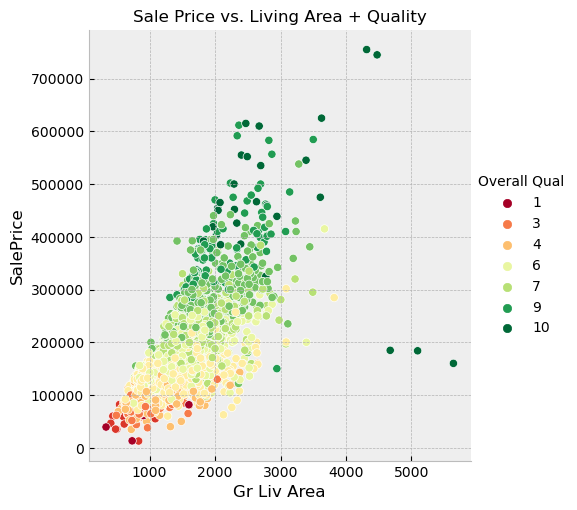

In [13]:
# sns.set_theme()
with plt.style.context('bmh'):
    sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette = 'RdYlGn')
plt.title("Sale Price vs. Living Area + Quality")
plt.show()

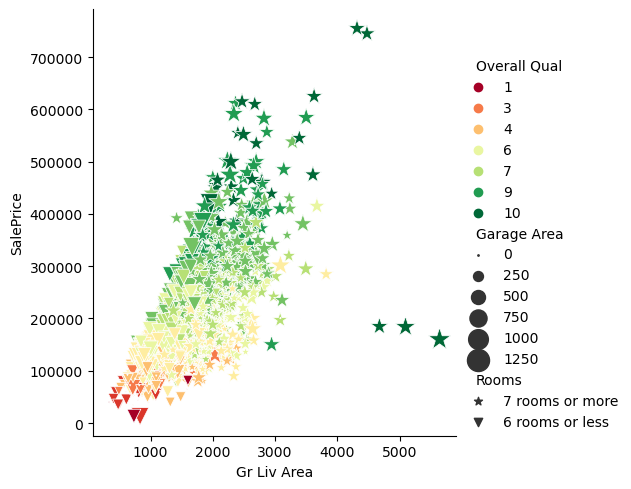

In [14]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Garage Area', sizes=(1,300),
            style='Rooms', markers=['*','v'])
plt.show()

## Object Oriented Charting

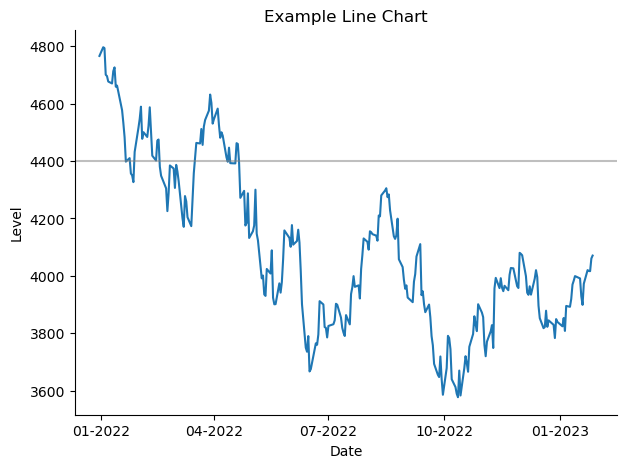

In [15]:
# Object Oriented Interface 

fig, ax = plt.subplots(figsize=(7,5))

ax.plot(spx_data.Date,spx_data.Close)
ax.set_title('Example Line Chart')
ax.set_xlabel('Date')
ax.set_ylabel('Level')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(bottom=True,left=True)
ax.axhline(y=4400, c='grey',alpha=0.5)



plt.show()


## Temporary rcParams Example

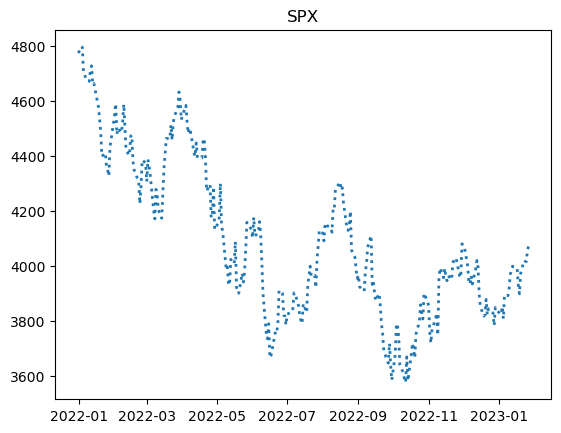

In [16]:
# Temporary rcparams example
with mpl.rc_context({'lines.linewidth': 2, 'lines.linestyle': ':'}):
        plt.plot(spx_data.Date, spx_data.Close)
plt.title('SPX')
plt.show()